## Central Limit Theorem

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) is a key result in probability theory that helps explain why normal, or Gaussian, distributions are so omnipresent. The setup is that you have distributions for $N$ random variables $x_i$ and you want to know the distribution of $q = \sum_{i=1}^{N} x_i$. Think of each $x_i$ as coming from it's own distribution like in the figure below. For instance, $x_1$ might be the weight of spoons, $x_2$ the weight of forks, $x_3$ the weight of bowls, ..., and $x_N$ of plates in your kitchen. Then $q$ would represent the total weight when you have one of each of those objects. The distribution of weights for each object might be weird because you have some mix-and-match set of silverware from your parents, grandparents, IKEA, and the thrift shop. The *central limit theorem* says that if you have enough objects (i.e. $N$ is large), then $q$ has a normal (Gaussian) distribution.

![](Central_limit_theorem.png)

Moreover, the central limit theorem states that the mean value of $q$ is given by

\begin{equation}
\mu_{q} = \sum_{i=1}^{N} \mu_{x_i} 
\end{equation}

and the variance (standard deviation squared) is given by

\begin{equation}
\sigma_{q}^{2} = \sum_{i=1}^{N} \sigma^2_{x_i} 
\end{equation}

*if you are having problems with the math displaing, click [here](http://nbviewer.jupyter.org/github/cranmer/intro-exp-phys-II/blob/master/Central-Limit-Theorem.ipynb?flush_cache=true)*

The mean probably isn't surprising because $q$ is just a sum and the integral the defines the mean just distributes across each term. Also, the equation for the variance is the same as the propagation of errors formula we use when we add different measurements together. However, that propoagation of errors formula is derived from the Central Limit Theorem, not vice versa.

### This is a collaborative project

In this repository there is a folder called `distributions` with several python files. The idea is that each student will create one of these python files and we will use GitHub to collect them. Each of these files has a python class that describes a probability distribution.  Each of these classes will define:
   * `x_min, x_max, f_max` - used for the accept/reject Monte Carlo sampling algorithm
   * `pdf()` - the probability density function
   * `mean()` - the mean of the pdf
   * `std()` - the standard deviation of the pdf
   
In addition, each of these python classes inherits from `BaseDistribution` which knows how to run the accept/reject algorithm using the information above ([see inside](distributions/base_distribution.py) ). In order to generate `n_samples` from the pdf, you simply call `dist.rvs(n_samples)`, where `dist` is an instance of one of these python classes.

**Naming Convention**: Name your file `Dist_<netid>.py` and your distribution the same way (without the `.py`). If you want to contribute more than one distribution, you can can add `Dist_<netid>_<index>.py`, where `<index>` is 1,2,3,...

Here's an example:

In [11]:
!cat distributions/Dist_abw400.py

import numpy as np
from .base_distribution import BaseDistribution

class Dist_abw400(BaseDistribution):
	def __init__(self):
		self.f_max = 1.5
		self.x_min = 0
		self.x_max = 1


	def pdf(self, x):
		"""This is your PDF"""
		return np.sqrt(x)/(2./3)

	def mean(self):
		"""This is the mean of the PDF"""
		return 0.6

	def std(self):
		"""This is the standard deviation of the pdf"""
		return np.sqrt(12./175)

# Part 1: Create your distribution Send pull request

Basically everyone has done this by now. The master branch of the repository has all the contributions

# Part 2: Pull the distribution to get all the contributed Distributions

Create a new branch called `part 2` from the master branch:

 1. First change to the master branch
 1. Second create new branch


Then, you need to open a shell (eg. from GitHub desktop you can:

 * Windows: `Repository > Open in Command Prompt`
 * Mac: `Repository > Open in Terminal`
 
 Then type: `git pull upstream master`
 
 Now you should have many new distributions.
 
 
# Part 3: Update and Execute this notebook. 
 
 The Cells labeled `In [10]` and `In [15]` refer to the distributon `Dist_kc90`. Update those lines to refer to yoru distribution. 
 
 Then Execute the full notebook. `Cell > Run All`

In [12]:
from datetime import date
date.today()

datetime.date(2020, 5, 14)

## Example usage of the distributions

Ok, now let's use them. So far there are only two distributions, but there will be more soon.

In [13]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


In [14]:
# import all our distributions
import distributions

In [15]:
# some funny python to make a list of all the distributions for convenience
all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]
# print out their names
all_distributions_dict.keys()

['Dist_ajt540',
 'Dist_dmc731',
 'Dist_os852',
 'Dist_ejt352',
 'Dist_ia1113',
 'Dist_lac683',
 'Dist_ks938',
 'Dist_sk7372',
 'Dist_pw1091',
 'Dist_rdm445',
 'Dist_sj2879',
 'Dist_bt1369',
 'Dist_ltw244',
 'Dist_cah736',
 'Dist_aew492',
 'Dist_kc90',
 'Dist_cmr653',
 'Dist_pbg240',
 'Dist_yx1796',
 'Dist_abw400',
 'Dist_jam1535',
 'Dist_kc90_4',
 'Dist_speedreed2',
 'Dist_knd286',
 'Dist_emm815',
 'Dist_npl248',
 'Dist_rmr557',
 'Dist_sb6187',
 'Dist_mkb452',
 'Dist_jdg577',
 'Dist_tt1392',
 'Dist_at4227',
 'Dist_sm6779',
 'Dist_speedreed',
 'Dist_sea438',
 'Dist_sdl433',
 'Dist_phh250']

In [16]:
len(all_distributions_dict.keys())

37

In [17]:
## Do tests
ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 10000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print("list of ok distributions:",[i.__name__ for i in ok_distributions_list])




Dist_ajt540 passes tests, adding it
Dist_dmc731 passes tests, adding it
Dist_os852 passes tests, adding it
Dist_ejt352 passes tests, adding it
Dist_ia1113 passes tests, adding it
Dist_ks938 passes tests, adding it
Dist_sk7372 passes tests, adding it
std devs. don't match for Dist_pw1091: 0.775216 vs. 0.886690
means don't match for Dist_mkb452: 2.070183 vs. 2.066190
std devs. don't match for Dist_rdm445: 0.709241 vs. 0.000000
may have a problem
Dist_bt1369 passes tests, adding it
Dist_ltw244 passes tests, adding it
Dist_cah736 passes tests, adding it
Dist_aew492 passes tests, adding it
Dist_abw400 passes tests, adding it
Dist_jam1535 has errors, does't work
std devs. don't match for Dist_cmr653: 1.153175 vs. 1.000000
Dist_sj2879 passes tests, adding it
Dist_yx1796 passes tests, adding it
Dist_kc90 passes tests, adding it
Dist_kc90_4 passes tests, adding it
Dist_speedreed2 passes tests, adding it
Dist_knd286 passes tests, adding it
Dist_emm815 passes tests, adding it
Dist_npl248 passes t

In [18]:
problems = [x for x in all_distributions_list if x not in ok_distributions_list]
[i.__name__ for i in problems]

['Dist_pw1091',
 'Dist_mkb452',
 'Dist_rdm445',
 'Dist_pbg240',
 'Dist_jam1535',
 'Dist_cmr653',
 'Dist_lac683',
 'Dist_sm6779']

In [19]:
# how many samples for plots?
n_samples = 100000

**Update to use your distribution**

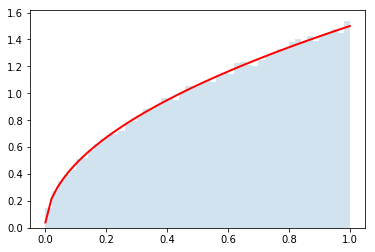

In [20]:
# Here's an example of usage
dist = distributions.Dist_abw400()
rvs = dist.rvs(n_samples)
counts, bins, edges = plt.hist(rvs, bins=50, density=True, alpha =0.2)
y = []
for bin in bins:
    y.append(dist.pdf(bin))
plt.plot(bins, y, c='r', lw=2)

In [21]:
dist.std()

0.26186146828319085

## Let's inspect all the distributions we have

Here we will loop over the different distributions and make a plot like the one above

Dist_ajt540: std from samples = 0.17, std from dist = 0.17
Dist_dmc731: std from samples = 0.69, std from dist = 0.70
Dist_os852: std from samples = 0.66, std from dist = 0.65
Dist_ejt352: std from samples = 0.71, std from dist = 0.71
Dist_ia1113: std from samples = 0.14, std from dist = 0.14
Dist_ks938: std from samples = 0.71, std from dist = 0.71
Dist_sk7372: std from samples = 0.77, std from dist = 0.77
Dist_bt1369: std from samples = 1.57, std from dist = 1.57
Dist_ltw244: std from samples = 0.58, std from dist = 0.58
Dist_cah736: std from samples = 1.45, std from dist = 1.45
Dist_aew492: std from samples = 0.39, std from dist = 0.39
Dist_abw400: std from samples = 0.26, std from dist = 0.26
Dist_sj2879: std from samples = 2.32, std from dist = 2.24
Dist_yx1796: std from samples = 0.51, std from dist = 0.52
Dist_kc90: std from samples = 0.71, std from dist = 0.71
Dist_kc90_4: std from samples = 0.71, std from dist = 0.71
Dist_speedreed2: std from samples = 1.41, std from dist = 1.

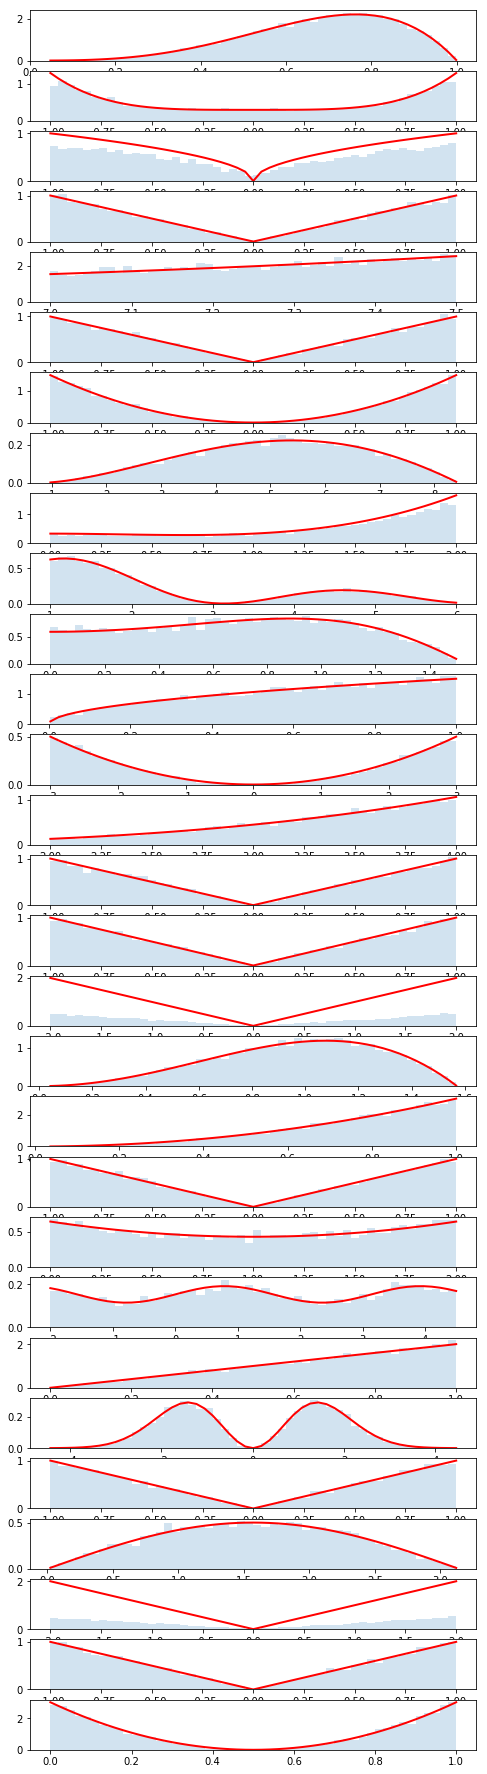

In [22]:
fig = plt.figure(figsize=2*plt.figaspect(len(ok_distributions_list)))
for i, cls in enumerate(ok_distributions_list):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, density=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)

Dist_pw1091: std from samples = 0.77, std from dist = 0.89
('looks like a problem with this distribution: ', <class 'distributions.Dist_pw1091.Dist_pw1091'>)
Dist_mkb452: std from samples = 0.06, std from dist = 0.06
Dist_rdm445: std from samples = 0.71, std from dist = 0.00


/Users/allison/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


('looks like a problem with this distribution: ', <class 'distributions.Dist_rdm445.Dist_rdm445'>)


KeyboardInterrupt: 

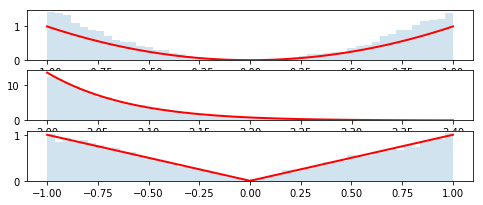

In [23]:
fig = plt.figure(figsize=2*plt.figaspect(len(problems)))
for i, cls in enumerate(problems):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, density=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)

## Demonstration of the Central Limit Theorem

ok, let's use one of the distributions to demonstrate the central limit theorem. We will use the same distribution $N$ times.

First let's make a little helper function.

In [24]:
def do_convolution(dist, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for i in range(N):
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

Now let's use it for $N=\{2,4,32\}$

**UPDATE THE NEXT LINE TO USE YOUR DISTRIBUTION**

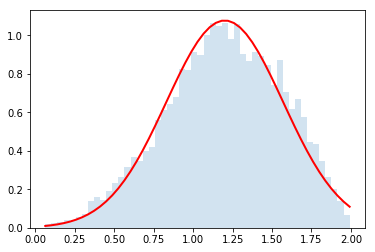

In [25]:
dist = distributions.Dist_abw400()  #update me!
do_convolution(dist,2)

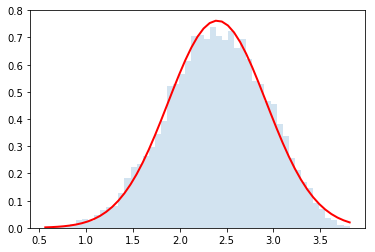

In [26]:
do_convolution(dist,4)

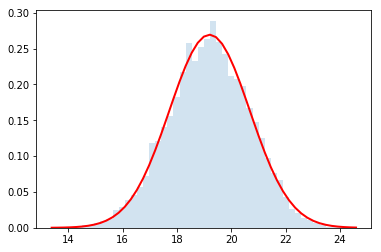

In [27]:
do_convolution(dist,32)

*Gorgeous!*

## Now let's do the same thing randomly using different distributions 

To do this we will use `np.random.choice` to randomly choose from our list. Here's an example

In [28]:
np.random.choice(['a','b','c','d'], 10)

array(['a', 'c', 'd', 'c', 'b', 'd', 'a', 'c', 'b', 'd'], dtype='|S1')

Now let's make a variation on the helper function above

In [29]:
def do_random_convolution(list_of_distributions, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

('Dist_speedreed2', 1.4142135623730951)
('Dist_ajt540', 0.17339222485840364)


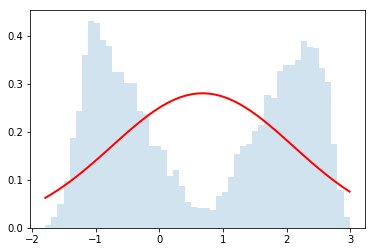

In [30]:
do_random_convolution(ok_distributions_list,2)

('Dist_sea438', 0.7071067811865476)
('Dist_kc90', 0.7071067811865476)
('Dist_jdg577', 1.7320508075688772)
('Dist_sk7372', 0.7745966692414834)


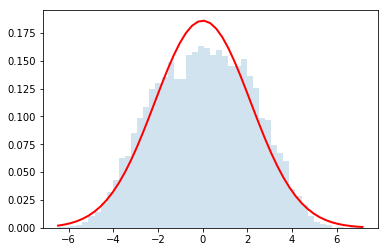

In [31]:
do_random_convolution(ok_distributions_list,4)

('Dist_sj2879', 2.23606797749979)
('Dist_npl248', 0.7071067811865476)
('Dist_kc90', 0.7071067811865476)
('Dist_ajt540', 0.17339222485840364)


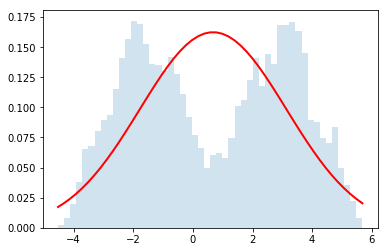

In [32]:
do_random_convolution(ok_distributions_list,4)

('Dist_knd286', 0.3070547093925828)
('Dist_speedreed2', 1.4142135623730951)
('Dist_ks938', 0.7071067811865476)
('Dist_phh250', 0.23570226039551584)
('Dist_phh250', 0.23570226039551584)
('Dist_ks938', 0.7071067811865476)
('Dist_abw400', 0.26186146828319085)
('Dist_ia1113', 0.14344336861632886)
('Dist_emm815', 0.19364916731037085)
('Dist_ejt352', 0.7071067811865476)
('Dist_dmc731', 0.696932)
('Dist_cah736', 1.4539601094940673)
('Dist_npl248', 0.7071067811865476)
('Dist_tt1392', 0.7071067811865476)
('Dist_ejt352', 0.7071067811865476)
('Dist_rmr557', 0.609449400220044)
('Dist_rmr557', 0.609449400220044)
('Dist_yx1796', 0.5157518783291051)
('Dist_at4227', 0.683667)
('Dist_ia1113', 0.14344336861632886)
('Dist_yx1796', 0.5157518783291051)
('Dist_sdl433', 0.3872983346207417)
('Dist_ia1113', 0.14344336861632886)
('Dist_sea438', 0.7071067811865476)
('Dist_abw400', 0.26186146828319085)
('Dist_ia1113', 0.14344336861632886)
('Dist_kc90', 0.7071067811865476)
('Dist_bt1369', 1.56953460038)
('Dist_jdg

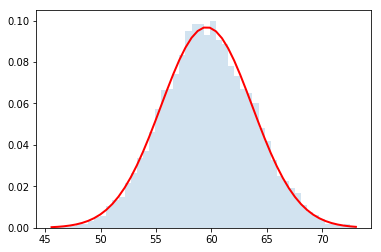

In [33]:
do_random_convolution(ok_distributions_list,32)

# Extra Credit: 


## a) Edit function below to calculate the $\chi^2$ for prediction and observation

Below is a copy of the `do_random_convolution` function with a new name. Modify it so taht it returns the chi-square quantity that says how closely the observed distribution matches the prediction from the Central Limit theorem.

You might want to check out the [chi-square-of-distribution](chi-square-of-distribution.ipynb) notebook

In [34]:
def do_random_convolution_with_chi2(list_of_distributions, N):
    n_samples = 100000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

## b) Make a plot

Plot the $\chi^2$ quantity vs. N for N=2,4,8,16,32

# Part 4: To Turn In: 

## a) Push a new version of this notebook to GitHub

Execute the notebook, get your plots, save it, commit the changes to the `part2` branch, and then push to GitHub.com.  When you are done, make a new pull request. (I won't accept the Pull Request, but it will help me find it).

## b) Save a PDF so you can turn in on NYU classes:

File > Download As > PDF via LaTeX

Upload to assignment in NYU classes

In [35]:
#make sure to execute this at the end
date.today()

datetime.date(2020, 5, 14)